# **Qualitative analysis of the occupations**

In this notebook, we will analyze the occupations of the individuals. There is a multiple of occupations so we will use several filters to reduce the number of them. Also, each occupation will compare to the type of the individuals: "jurist", "economist" and "jurist/economist". Finally, we can appreciate the evolution of the differents of occupation in the time.

In [1]:
# Import of the libraries

from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML

from collections import Counter
from operator import itemgetter

import sqlite3 as sql
import time

from importlib import reload
from shutil import copyfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pprint
import csv
import ast
import re

In [2]:
import sparql_functions as spqf

### **Execution of queries necessary**

In [3]:
### It's define the database ligne to use
pk_query = 22

# Connexion to the database
original_db = 'data/sparql_queries.db'
conn = sql.connect(original_db)

c = conn.cursor()

### It runs the query on the SQLite database to get the row values 
c.execute('SELECT * FROM query WHERE pk_query = ?', [pk_query]) ### a list around argument is needed for a string longer then one
#c.execute('SELECT * FROM query WHERE pk_query = 10')

rc = c.fetchone()

# close connexion
conn.close()


In [4]:
print("\033[1mDescription:\033[0m\n\n"+rc[3]  + "\n-----\n" +"\033[1mDatabase:\033[0m\n\n"+ rc[2]+  "\n----\n"+"\033[1mNotes:\033[0m\n\n" +rc[7] + "\n----\n"+"\033[1mTime stamp:\033[0m\n\n"+rc[8]+  "\n--------------\n" +"\033[1mSparl endpoint:\033[0m\n\n"+   rc[5] + "\n-----------\n" +"\033[1mQuery:\033[0m\n\n"+ rc[6])

Description:

The query counts the number of individuals for each occupation and keeps only the occupation with more than 100 individuals.
-----
Database:

Wikidata
----
Notes:

In the request, we remove the professions "economist" and "lawyer" because we seek to obtain the professions assigned by individuals in addition to these two professions.
----
Time stamp:

2021-06-23 15:37:43
--------------
Sparl endpoint:

http://localhost:7200/repositories/IMPORT
-----------
Query:

PREFIX  egr:  <http://rdvocab.info/ElementsGr2/>
PREFIX  owl:  <http://www.w3.org/2002/07/owl#>
PREFIX  rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX  ome:  <https://ontome.net/class/>
PREFIX  wdt:  <http://www.wikidata.org/prop/direct/>
PREFIX  xsd:  <http://www.w3.org/2001/XMLSchema#>
PREFIX  bio:  <http://vocab.org/bio/0.1/>
PREFIX  rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX  wd:   <http://www.wikidata.org/entity/>


            SELECT DISTINCT ?occupation ?count_occupation
              

In [5]:
### Execute the SPARQL query wrapped in the function in the library _sparql_functions.py_
# The first setting correspond to SPARQL Endpoint, the seconde to the query
q = spqf.get_json_sparql_result(rc[5],rc[6])

<class 'dict'>


In [6]:
##### Transform the result into a list with a fonction of the library #####
#### Result of the query
r_query = [l for l in spqf.sparql_result_to_list(q)]
print(len(r_query))
#r_query

97


In [8]:
### Create a dataframe
df_result = pd.DataFrame(r_query)
df_result.columns =['id_entity', 'occupation', 'year', 'type']
df_result[:15]

,occupation,count_occupation
0,politician,45482
1,university teacher,9150
2,writer,5339
3,diplomat,4557
4,journalist,3588
5,businessperson,1976
6,historian,1897
7,banker,1526
8,military officer,1426
9,professor,1068


In [16]:
### We encode to obtain of three types: "jurist", "economist" and "jurist/economist"  
## ( In the SPARQL query, a concatenation of the type has been processed cf. SQLite: query n°106)
df_result['type'].replace(["jurist|jurist", "jurist|jurist|jurist", "jurist|jurist|jurist|jurist", "legal jurist in France", "jurist|legal jurist in France"],'jurist',inplace=True)
df_result['type'].replace(["jurist|jurist|economist", "jurist|jurist|jurist|economist", "jurist|jurist|jurist|jurist", "jurist|economist|jurist", "economist|jurist", "jurist|economist"],'jurist/economist',inplace=True)


In [17]:
df_result.sort_values(by=['id_entity'])

,id_entity,occupation,year,type
374,urn:uuid:000112b4-4917-4e23-a009-0c9bf8b6457b,politician,1955,jurist
6128,urn:uuid:00033b44-dea6-4a45-bd42-c4995e5e3919,politician,1848,jurist
23752,urn:uuid:0005ad09-b055-41d6-b1ef-fdcc01a486d7,politician,1844,jurist
46199,urn:uuid:00080459-4f26-41f7-984d-cffc000c95ab,model,1988,jurist
11734,urn:uuid:00085937-75d7-4b71-a47d-636951c7051f,writer,1936,jurist
...,...,...,...,...
9583,urn:uuid:fffa541a-7c2e-407a-a9a4-b9faa4abd267,journalist,1932,economist
27715,urn:uuid:fffee4db-7cfc-453f-8bd8-40faadc74038,writer,1896,economist
16199,urn:uuid:ffff6c62-8684-4ebf-8966-3539c5fdf784,journalist,1954,economist
16198,urn:uuid:ffff6c62-8684-4ebf-8966-3539c5fdf784,writer,1954,economist


In [18]:
# Export dataframe in a CSV format
## This is useful to do not run again the query
df_result.to_csv('spreadsheets/occupations.csv', sep="|",index=False) 

In [14]:
occupation= pd.read_csv('spreadsheets/Occupation/occupations.csv', sep="|")

In [15]:
### group the occupations with group by
gb_occupation = occupation.groupby(['occupation']).size()
gb_occupation.sort_values(ascending = False)

occupation
politician            26652
university teacher     4914
writer                 2803
diplomat               2391
journalist             2002
                      ...  
color commentator         1
colonizer                 1
piano teacher             1
pilote de guerre          1
Academy of Finland        1
Length: 1522, dtype: int64

In [16]:
### Transform the object 'Series' into a DataFrame and add the label of the 'frequency' column
# continent is defined as an index
df_occupation = gb_occupation.to_frame()
df_occupation.columns = ['frequency']

In [11]:
### create a new column with the frequencies of the occupations
## Only the frequencies superiors to one hundred are kept
df_occupation_1 = df_occupation[df_occupation['frequency'] > 100]
df_occupation_1.sort_values(by="frequency", ascending = False)

,frequency
occupation,
politician,26652
university teacher,4914
writer,2803
diplomat,2391
journalist,2002
historian,1016
businessperson,996
banker,756
military officer,696


In [9]:
# Creation another dataframe to preserve only the occupations with a great frequency
# This dataframe is realize with a SPARQL query.
# These occupations will merge with the individuals after.
df_result = pd.DataFrame(r_query)
df_result.columns =['occupation', 'count_occupation']
df_result[:15]

,occupation,count_occupation
0,politician,45482
1,university teacher,9150
2,writer,5339
3,diplomat,4557
4,journalist,3588
5,businessperson,1976
6,historian,1897
7,banker,1526
8,military officer,1426
9,professor,1068


In [12]:
df_result.to_csv('spreadsheets/Occupation/occupations_count.csv', sep="|",index=False) 

In [13]:
c_occ= pd.read_csv('spreadsheets/Occupation/occupations_count.csv', sep="|")
c_occ[:50]

,occupation,count_occupation
0,politician,45482
1,university teacher,9150
2,writer,5339
3,diplomat,4557
4,journalist,3588
5,businessperson,1976
6,historian,1897
7,banker,1526
8,military officer,1426
9,professor,1068


In [28]:
# Merge indivuals with occupations preserved
merged=pd.merge(occupation, c_occ,on='occupation', how='inner', sort=False)
merged[:10]

,id_entity,occupation,year,type,count_occupation
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,politician,1959,economist,45482
1,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,politician,1884,jurist,45482
2,urn:uuid:2178758f-d8df-447d-b64b-bd78dfe045b7,politician,1940,economist,45482
3,urn:uuid:490ab506-b377-4e39-bf39-3d6e3f732a62,politician,1907,jurist,45482
4,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,politician,1927,jurist,45482
5,urn:uuid:9179aad4-9c44-4d9b-98f6-9d97ad36baa6,politician,1833,jurist,45482
6,urn:uuid:f4d660c4-0a91-4a26-b73e-fee221b0919a,politician,1934,jurist,45482
7,urn:uuid:42059454-7941-47d7-9bc7-5ec28743220c,politician,1954,jurist,45482
8,urn:uuid:fb8010fe-ab7c-4f8f-a851-7a07bcec70e2,politician,1964,jurist,45482
9,urn:uuid:540d8caa-be15-478e-974f-50f02ddf2680,politician,1922,jurist,45482


#### **Encode the occupations**
We encode the occupations and group them for having less.

In [39]:
### artist
merged['occupation'].replace(["photographer", "musician", "singer", "painter", "composer", "film actor"],'artist',inplace=True)
### writer
merged['occupation'].replace(["writer", "novelist", "non-fiction writer", "author", "poet", "children's writer" , "playwright", "biographer", "autobiographer", "essayist", "screenwriter", "poet lawyer"],'writer',inplace=True)
### politician
merged['occupation'].replace(["diplomat","official", "statesperson", "minister", "lobbyist"],'politician',inplace=True)
### soldier
merged['occupation'].replace(["military officer", "military personnel"],'soldier',inplace=True)
### social researcher
merged['occupation'].replace(["linguist", "historian", "philosopher", "political scientist", "sociologist", "geographer", "anthropologist", "legal historian"],'social researcher',inplace=True)
### activist
merged['occupation'].replace(["human rights activist", "feminist", "peace activist", "environmentalist"],'activist',inplace=True)
### journalist
merged['occupation'].replace(["columnist", "opinion journalist"],'journalist',inplace=True)
### academic
merged['occupation'].replace(["lecturer", "university teacher", "professor", "full professor", "legal scholar"],'academic',inplace=True)
### businessperson
merged['occupation'].replace(["manager", "business executive", "entrepreneur", "chief executive officer", "director"],'businessperson',inplace=True)
## athlete
merged['occupation'].replace(["American football player", "cricketer", "basketball player", "cricketer", "athletics competitor", "association football player"],'athlete',inplace=True)
### banker
merged['occupation'].replace(["financier"],'banker',inplace=True)
### teacher
merged['occupation'].replace(["pedagogue"],'teacher',inplace=True)
### media person
merged['occupation'].replace(["television presenter", "television actor", "television producer", "radio personality", "film producer", "film director", "public figure"],'media person',inplace=True)
### religious
merged['occupation'].replace(["theologian", "television actor", "Catholic priest", "priest"],'religious',inplace=True)
### scientist
merged['occupation'].replace(["mathematician", "scientist", "statistician", "physician", "researcher"],'scientist',inplace=True)
### other
merged['occupation'].replace(["civil servant", "translator", "engineer", "trade unionist", "actor", "farmer", "publisher", "literary critic", "notary","slaveholder", "librarian", "agronomist", "psychologist", "contributing editor", "police officer", "blogger","consultant", "editor"],'other',inplace=True)

In [40]:
# Keep only the columns needed and drop duplicates
coded_occupations=merged[["id_entity","occupation",'type']].drop_duplicates()
print(len(coded_occupations))
# Set entity as index
coded_occupations.set_index('id_entity',inplace=True)

50192


In [41]:
# Group by occupation
gb_coded_occupations = coded_occupations.groupby('occupation').size()
gb_coded_occupations.sort_values(ascending = False).head(50)

occupation
politician           27647
academic              5871
writer                3684
other                 2293
journalist            2202
social researcher     1993
businessperson        1477
soldier                937
banker                 805
teacher                728
scientist              697
activist               513
athlete                418
media person           390
artist                 356
religious              181
dtype: int64

In [42]:
### Transform the object 'Series' into a DataFrame and add the label of the 'frequency' column
df_coded_occ = gb_coded_occupations.to_frame()
df_coded_occ.columns = ['frequency']
print(len(df_coded_occ))
#df_coded_occ

16


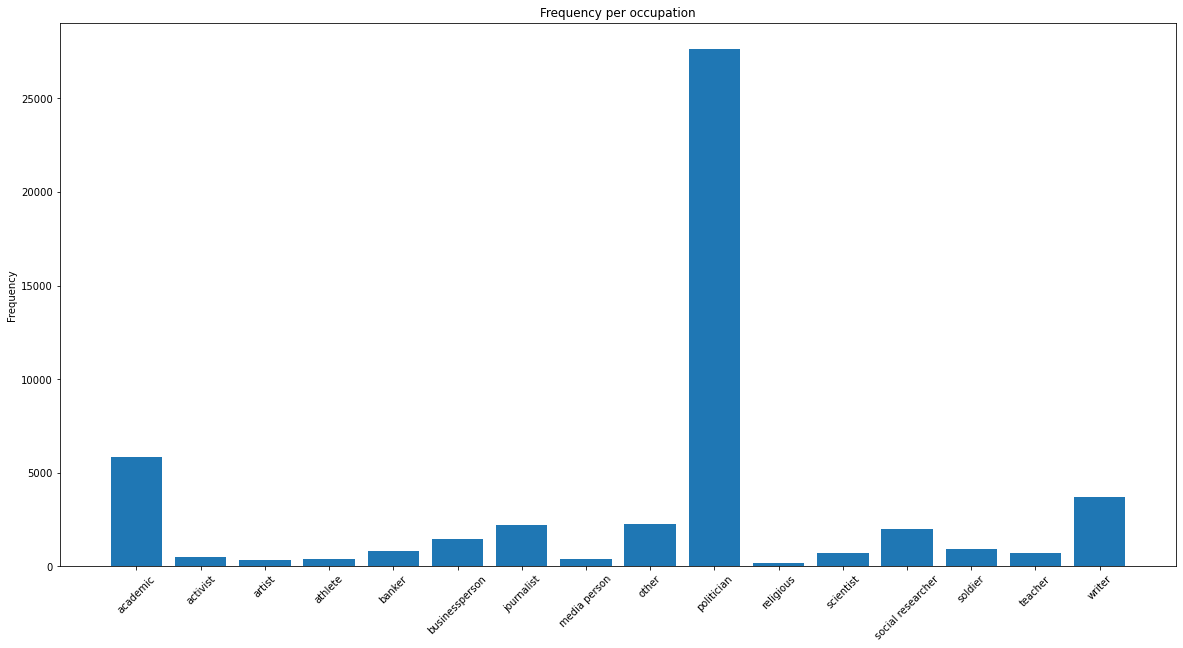

In [43]:
objects = [l for l in df_coded_occ.index]
eff = [l for l in df_coded_occ['frequency']]

p1 = plt.bar(objects, eff)

plt.ylabel('Frequency')
plt.title('Frequency per occupation')
plt.gcf().set_size_inches(20, 10)
#plt.gca().axes.get_xaxis().set_visible(False)
#plt.savefig('exported_pictures/nationalities/Frequency_continent.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


In [44]:
coded_occupations.to_csv("spreadsheets/Occupation/occupation_type.csv", sep="|")

## **Contingency table between occupations and types**

In [45]:
occupation_type=pd.read_csv("spreadsheets/Occupation/occupation_type.csv", sep="|")

In [46]:
# to create a contingency table: cf.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
Y = "occupation"  
X = "type"

contingency = occupation_type[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len, margins=True, margins_name='All*').fillna(0).astype(int) 
contingency = contingency.sort_values(by="All*")
contingency= contingency.loc[:,contingency.columns!="All*"]
contingency

type,economist,jurist,jurist/economist
occupation,,,
religious,27,153,1
artist,54,298,4
media person,69,319,2
athlete,31,384,3
activist,74,435,4
scientist,533,153,11
teacher,180,532,16
banker,525,240,40
soldier,45,888,4


In [47]:
stacked_data = contingency.apply(lambda x: x*100/sum(x), axis=1)

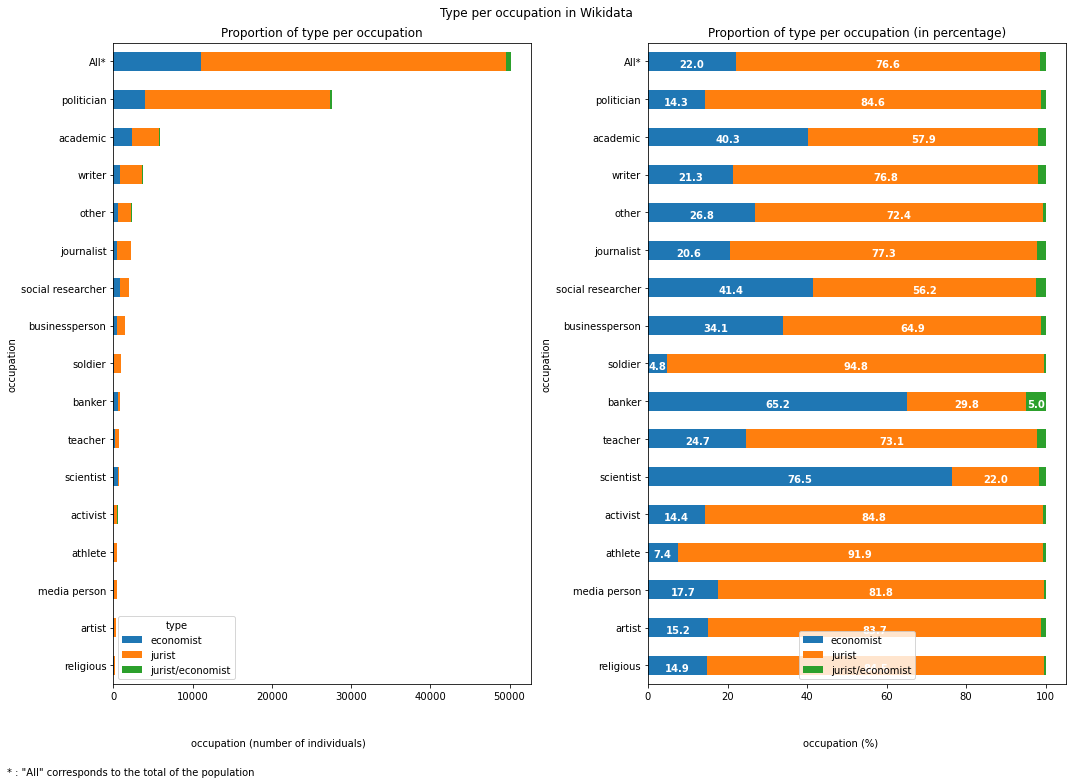

In [48]:
### create subplots side by side: 
# It is the best way, I found, but there are many other: cf. https://stackoverflow.com/questions/56121883/subplots-frequency-plots

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Type per occupation in Wikidata')
contingency.plot( kind='barh', stacked=True, ax=ax1, title="Proportion of type per occupation")
z=stacked_data.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of type per occupation (in percentage)")
plt.tight_layout()

# Set labels and legends: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

fig.text(0.747, -0.05, 'occupation (%)', ha='left', va='bottom')
fig.text(0.180, -0.05, 'occupation (number of individuals)', ha='left', va='bottom')
fig.text(0.01, -0.09, '* : "All" corresponds to the total of the population', ha='left', va='bottom')

#  Add percentages on the right plot: cf. https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
### drop the values inferior to: https://stackoverflow.com/questions/54682665/hide-matplot-annotation-if-value-is-0 

for p in z.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 3:
        z.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('exported_pictures/occupations/Type_per_occupation.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.legend(loc='lower center')
plt.show()

## Analysis of the occupations per continent

In [74]:
# Import the spreadsheet with the continents, created in another notebook: cf Analysis_nationalities_wikidata.ipynb
# rename 'uri' in 'id' and 'occupation' in 'type' to have the same column names
df_COG= pd.read_csv("spreadsheets/continent_occ_gender.csv", sep="|", header=0)
df_COG=df_COG.rename(columns={"occupation": "type", "uri_entity":"id_entity"})

In [75]:
# Choose columns to realise the merge between the both dataframes, with continents and with occupation
col=["id_entity", "type"]

In [76]:
# Merge continent dataframe and occupation dataframe
df_OC=pd.merge(df_COG, coded_occupations,on=col, how='inner', sort=False)
df_OC

,Unnamed: 0,id_entity,year,continent,type,gender,occupation
0,0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,North Am.,economist,male,politician
1,1,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,North Am.,jurist,male,politician
2,1,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,North Am.,jurist,male,businessperson
3,3,urn:uuid:080c5cc7-c62c-46ec-b0e9-0b98b6adc235,1927,North Am.,economist,male,academic
4,5,urn:uuid:50628dbc-50cd-4fd7-93f6-a444c2dac636,1860,North Am.,jurist,male,academic
5,6,urn:uuid:d5e86bba-4821-421e-9706-438a58c978a3,1873,North Am.,jurist,male,academic
6,6,urn:uuid:d5e86bba-4821-421e-9706-438a58c978a3,1873,North Am.,jurist,male,writer
7,7,urn:uuid:84d140c5-57f6-4a86-a8d2-280219e33b79,1882,North Am.,jurist,male,academic
8,8,urn:uuid:c9fbd132-1389-44cd-a122-50c8a27dfe45,1900,North Am.,jurist,male,academic
9,11,urn:uuid:4e83a928-d869-43d5-9d29-a96a8ee0151f,1881,North Am.,jurist,male,academic


In [81]:
# Change categories of the occupations to have as few as possible
df_OC['occupation'].replace(["journalist"],'media person',inplace=True)
df_OC['occupation'].replace(["scientist", "academic","social researcher"],'scientist',inplace=True)
df_OC['occupation'].replace(["banker"],'businessperson',inplace=True)
df_OC['occupation'].replace(["religious", "artist", "soldier", "other"],'other_occupation',inplace=True)


#### **Continent-Occupation contingency table**

In [82]:
### Occupation-continent contingency table with totals

X = "occupation"
Y = "continent"

contingContOcc = df_OC[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len, margins=True, margins_name='All*').fillna(0).astype(int) 
# Sort the values by the total to see better with the visualization
contingContOcc = contingContOcc.sort_values(by="All*")
# Drop the column "All",  otherwise it appears as the modality in the plot
contingContOcc= contingContOcc.loc[:,contingContOcc.columns!="All*"]
# Drop the row "uncoded" because the number of individuals is too little
contingContOcc= contingContOcc.drop(['uncoded'])
contingContOcc

occupation,activist,athlete,businessperson,media person,other_occupation,politician,scientist,teacher,writer
continent,,,,,,,,,
Central Am.,7,6,14,25,25,295,28,4,52
Oceania,9,32,42,36,114,393,112,3,47
Africa,50,6,103,35,60,720,129,7,64
Middle East,54,3,98,126,116,936,211,33,198
Asia,66,10,110,75,166,1655,391,25,177
South Am.,54,8,248,483,271,3211,568,93,543
North Am.,134,251,711,697,1487,11081,1571,197,796
Europe,160,108,1005,1196,1616,9646,5802,387,1905
All*,534,424,2332,2676,3855,27939,8812,749,3783


In [83]:
# change the number of individuals into a percentage
perc_contin_OC= contingContOcc.apply(lambda x: x*100/sum(x), axis=1)

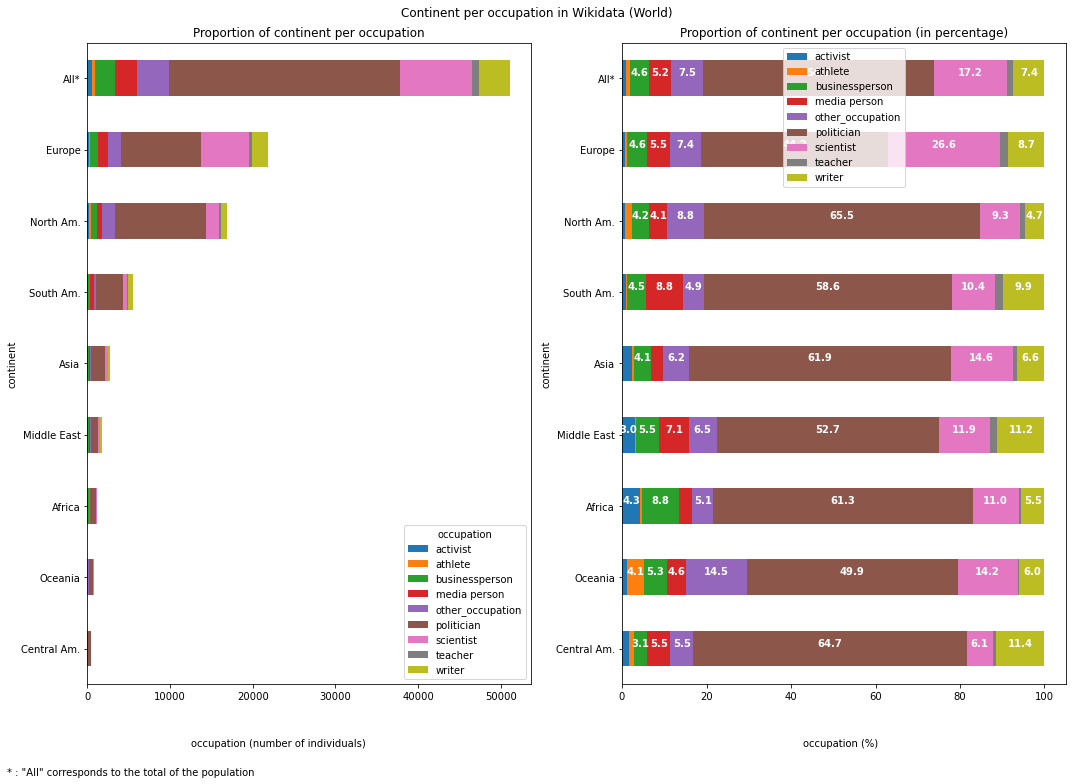

In [105]:
### create subplots side by side: 
# It is the best way, I found, but there are many other: cf. https://stackoverflow.com/questions/56121883/subplots-frequency-plots

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Continent per occupation in Wikidata (World)')
contingContOcc.plot( kind='barh', stacked=True, ax=ax1, title="Proportion of continent per occupation")
z_CO=perc_contin_OC.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of continent per occupation (in percentage)")
plt.tight_layout()

# Set labels and legends: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

fig.text(0.747, -0.05, 'occupation (%)', ha='left', va='bottom')
fig.text(0.180, -0.05, 'occupation (number of individuals)', ha='left', va='bottom')
fig.text(0.01, -0.09, '* : "All" corresponds to the total of the population', ha='left', va='bottom')

#  Add percentages on the right plot: cf. https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
### drop the values inferior to: https://stackoverflow.com/questions/54682665/hide-matplot-annotation-if-value-is-0 

for p in z_CO.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 3:
        z_CO.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

        
plt.savefig('exported_pictures/occupations/Continent_per_occupation.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.legend(loc='upper center')
plt.show()

### **Analysis of the occupation per generation over the world**

In [85]:
# Create a list of generation (twenty years) periods
d20List = []
period = 20
d_start = 1771
i = 0
d20List.append(d_start)

while i < 11:
    d_start = d_start + period
    d20List.append(d_start)
    i += 1

In [86]:
# Copy the dataframe for do not work on it.
df_generation_OC = df_OC.copy(deep=True)
# Keep only the people born before 1950 (because as we can see above the number of individuals after 1950 decreases strongly,
# it is very probably a biais on the datas does not enter in Wikidata yet)
df_generation_OC= df_generation_OC[df_generation_OC["year"]<=1950]
# add a column and cut individuals by their date of birth with the list just above.
df_generation_OC['generation'] = pd.cut(df_generation_OC['year'], d20List, right=False)

In [87]:
df_generation_OC

,Unnamed: 0,id_entity,year,continent,type,gender,occupation,generation
1,1,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,North Am.,jurist,male,politician,"[1911, 1931)"
2,1,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,North Am.,jurist,male,businessperson,"[1911, 1931)"
3,3,urn:uuid:080c5cc7-c62c-46ec-b0e9-0b98b6adc235,1927,North Am.,economist,male,scientist,"[1911, 1931)"
4,5,urn:uuid:50628dbc-50cd-4fd7-93f6-a444c2dac636,1860,North Am.,jurist,male,scientist,"[1851, 1871)"
5,6,urn:uuid:d5e86bba-4821-421e-9706-438a58c978a3,1873,North Am.,jurist,male,scientist,"[1871, 1891)"
6,6,urn:uuid:d5e86bba-4821-421e-9706-438a58c978a3,1873,North Am.,jurist,male,writer,"[1871, 1891)"
7,7,urn:uuid:84d140c5-57f6-4a86-a8d2-280219e33b79,1882,North Am.,jurist,male,scientist,"[1871, 1891)"
8,8,urn:uuid:c9fbd132-1389-44cd-a122-50c8a27dfe45,1900,North Am.,jurist,male,scientist,"[1891, 1911)"
9,11,urn:uuid:4e83a928-d869-43d5-9d29-a96a8ee0151f,1881,North Am.,jurist,male,scientist,"[1871, 1891)"
10,12,urn:uuid:6fc582b5-30c3-4dee-8ac7-b4364ff05847,1925,North Am.,jurist,male,scientist,"[1911, 1931)"


In [88]:
# improve the code by changing it to "YYYY-YYYY" format
df_generation_OC['generation'] = df_generation_OC['generation'].apply(lambda row : str(int(row.left))+'-'+str(int(row.right)))
df_generation_OC

,Unnamed: 0,id_entity,year,continent,type,gender,occupation,generation
1,1,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,North Am.,jurist,male,politician,1911-1931
2,1,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,North Am.,jurist,male,businessperson,1911-1931
3,3,urn:uuid:080c5cc7-c62c-46ec-b0e9-0b98b6adc235,1927,North Am.,economist,male,scientist,1911-1931
4,5,urn:uuid:50628dbc-50cd-4fd7-93f6-a444c2dac636,1860,North Am.,jurist,male,scientist,1851-1871
5,6,urn:uuid:d5e86bba-4821-421e-9706-438a58c978a3,1873,North Am.,jurist,male,scientist,1871-1891
6,6,urn:uuid:d5e86bba-4821-421e-9706-438a58c978a3,1873,North Am.,jurist,male,writer,1871-1891
7,7,urn:uuid:84d140c5-57f6-4a86-a8d2-280219e33b79,1882,North Am.,jurist,male,scientist,1871-1891
8,8,urn:uuid:c9fbd132-1389-44cd-a122-50c8a27dfe45,1900,North Am.,jurist,male,scientist,1891-1911
9,11,urn:uuid:4e83a928-d869-43d5-9d29-a96a8ee0151f,1881,North Am.,jurist,male,scientist,1871-1891
10,12,urn:uuid:6fc582b5-30c3-4dee-8ac7-b4364ff05847,1925,North Am.,jurist,male,scientist,1911-1931


In [89]:
# Construct a dateframe with the number of individuals by generation
pt_generation_OC = pd.pivot_table(df_generation_OC, index=['generation'], values='year', aggfunc=len,fill_value=0)
print(type(pt_generation_OC))
pt_generation_OC

<class 'pandas.core.frame.DataFrame'>


,year
generation,
1771-1791,929
1791-1811,1585
1811-1831,2399
1831-1851,2751
1851-1871,3819
1871-1891,4664
1891-1911,4843
1911-1931,6145
1931-1951,9878


In [90]:
### Generation-occupation Contingency table

X = "generation"  
Y = "occupation"

generation_occupation = df_generation_OC[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len).fillna(0).astype(int) 
generation_occupation

occupation,activist,athlete,businessperson,media person,other_occupation,politician,scientist,teacher,writer
generation,,,,,,,,,
1771-1791,1,2,14,29,97,631,91,5,59
1791-1811,0,2,22,69,134,1042,202,11,103
1811-1831,5,7,45,142,252,1486,269,28,165
1831-1851,4,14,69,166,219,1704,335,42,198
1851-1871,13,37,100,242,244,2330,464,72,317
1871-1891,30,86,138,310,340,2703,600,75,382
1891-1911,29,65,150,272,472,2518,817,101,419
1911-1931,56,48,254,287,603,3121,1129,102,545
1931-1951,98,76,568,435,614,4875,2327,145,740


In [91]:
# change the number of individuals into a percentage
perc_contin = generation_occupation.apply(lambda x: x*100/sum(x), axis=1)

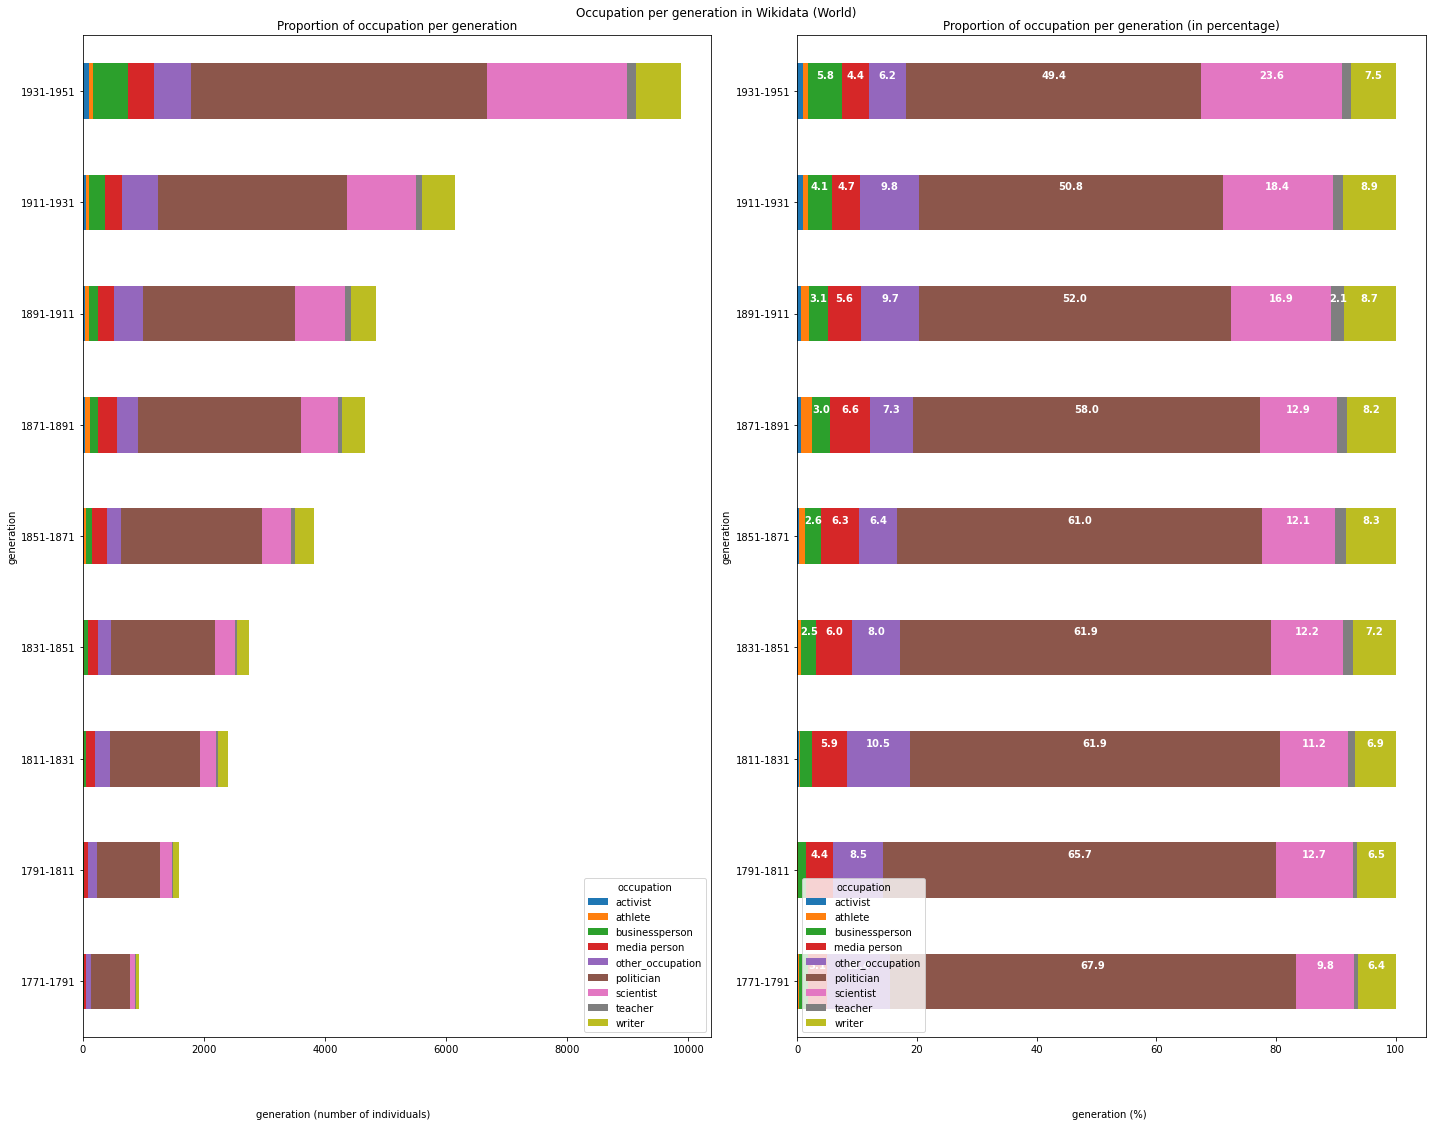

In [92]:
# create subplots side by side:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
fig.suptitle('Occupation per generation in Wikidata (World)')
generation_occupation.plot( kind='barh', stacked=True, ax=ax1, title="Proportion of occupation per generation")
z_cont=perc_contin.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of occupation per generation (in percentage)")
plt.tight_layout()

# Set labels and legends

fig.text(0.747, -0.05, 'generation (%)', ha='left', va='bottom')
fig.text(0.180, -0.05, 'generation (number of individuals)', ha='left', va='bottom')

#  Add percentages on the right plot: 

for p in z_cont.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 2:
        z_cont.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

ax1.legend( title= "occupation", loc='lower right')
ax2.legend( title= "occupation",loc='lower left')
plt.savefig('exported_pictures/occupations/Occupation_per_generation.png', dpi=100, bbox_inches = "tight") #pdf, svg

plt.show()

## **Analysis of the occupations in Europe**

First, we import the spreadsheet with the European region, created in another notebook: cf. Analysis_nationalities_wikidata.ipynb

Then, we rename 'uri' in 'id' and 'occupation' in 'type' to have the same column names.

In [93]:
europe=pd.read_csv("spreadsheets/Occupation/europe_indi.csv", sep="|")
europe= europe.rename(columns={"occupation": "type", "uri_entity":"id_entity"})

In [94]:
col=["id_entity", "year","type","gender"]

In [95]:
merged_euro= pd.merge(df_generation_OC,europe,on=col, sort=False)
merged_euro

,Unnamed: 0,id_entity,year,continent,type,gender,occupation,generation,region
0,72,urn:uuid:eabd8139-89e4-4040-9bd4-ffd2a71713b5,1926,North Am.,economist,male,politician,1911-1931,Eastern Europe
1,40342,urn:uuid:eabd8139-89e4-4040-9bd4-ffd2a71713b5,1926,Europe,economist,male,politician,1911-1931,Eastern Europe
2,421,urn:uuid:0de6c0dc-2e01-46ce-8826-841e6c7867b8,1899,North Am.,economist,male,scientist,1891-1911,Central Europe
3,113746,urn:uuid:0de6c0dc-2e01-46ce-8826-841e6c7867b8,1899,Europe,economist,male,scientist,1891-1911,Central Europe
4,514,urn:uuid:ab1769f4-02ef-4923-b970-5ad678782682,1925,North Am.,jurist,male,scientist,1911-1931,Central Europe
5,58212,urn:uuid:ab1769f4-02ef-4923-b970-5ad678782682,1925,Europe,jurist,male,scientist,1911-1931,Central Europe
6,1075,urn:uuid:0139342c-3301-41e3-acf9-6f42dfd140a8,1852,North Am.,jurist,male,politician,1851-1871,British Isles
7,1075,urn:uuid:0139342c-3301-41e3-acf9-6f42dfd140a8,1852,North Am.,jurist,male,media person,1851-1871,British Isles
8,47570,urn:uuid:0139342c-3301-41e3-acf9-6f42dfd140a8,1852,Europe,jurist,male,politician,1851-1871,British Isles
9,47570,urn:uuid:0139342c-3301-41e3-acf9-6f42dfd140a8,1852,Europe,jurist,male,media person,1851-1871,British Isles


In [96]:
merged_euro=merged_euro[["id_entity","type","gender","occupation","generation","region"]].drop_duplicates()
merged_euro

,id_entity,type,gender,occupation,generation,region
0,urn:uuid:eabd8139-89e4-4040-9bd4-ffd2a71713b5,economist,male,politician,1911-1931,Eastern Europe
2,urn:uuid:0de6c0dc-2e01-46ce-8826-841e6c7867b8,economist,male,scientist,1891-1911,Central Europe
4,urn:uuid:ab1769f4-02ef-4923-b970-5ad678782682,jurist,male,scientist,1911-1931,Central Europe
6,urn:uuid:0139342c-3301-41e3-acf9-6f42dfd140a8,jurist,male,politician,1851-1871,British Isles
7,urn:uuid:0139342c-3301-41e3-acf9-6f42dfd140a8,jurist,male,media person,1851-1871,British Isles
10,urn:uuid:bca0dc8b-cd3c-4760-8860-c528d5751297,economist,male,media person,1931-1951,Central Europe
11,urn:uuid:bca0dc8b-cd3c-4760-8860-c528d5751297,economist,male,scientist,1931-1951,Central Europe
14,urn:uuid:1d42d4be-5b4b-4208-b6af-cfabf172a374,jurist,male,athlete,1851-1871,British Isles
16,urn:uuid:f1739861-e4ea-4b35-84d7-762efe495ea6,jurist,male,politician,1851-1871,British Isles
18,urn:uuid:f4145375-aeb2-4774-a204-b369a88283b8,jurist,male,other_occupation,1891-1911,Central Europe


In [97]:
merged_euro['occupation'].replace(["journalist"],'media person',inplace=True)
merged_euro['occupation'].replace(["scientist", "academic","social researcher"],'scientist',inplace=True)
merged_euro['occupation'].replace(["banker"],'businessperson',inplace=True)
merged_euro['occupation'].replace(["religious", "artist", "soldier", "other_occ"],'other_occupation',inplace=True)

In [98]:
### Occupation-continent contingency table with totals

X = "occupation"
Y = "region"

contingEuroOcc = merged_euro[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len, margins=True, margins_name='All*').fillna(0).astype(int) 
# Sort the values by the total to see better with the visualization
contingEuroOcc = contingEuroOcc.sort_values(by="All*")
# Drop the column "All",  otherwise it appears as the modality in the plot
contingEuroOcc= contingEuroOcc.loc[:,contingEuroOcc.columns!="All*"]
contingEuroOcc

occupation,activist,athlete,businessperson,media person,other_occupation,politician,scientist,teacher,writer
region,,,,,,,,,
Scandinavia,3,8,63,28,133,432,141,3,78
Southeastern Europe,11,2,34,90,128,645,255,10,149
Eastern Europe,8,1,38,161,139,593,322,23,119
British Isles,7,48,41,57,111,706,256,8,177
Western Europe,26,5,92,132,131,961,527,24,172
Southern Europe,13,7,140,207,146,1325,675,41,395
Central Europe,20,13,123,263,467,1872,1472,192,465
All*,88,84,531,938,1255,6534,3648,301,1555


In [99]:
# change the number of individuals into a percentage
perc_contin_OE= contingEuroOcc.apply(lambda x: x*100/sum(x), axis=1)

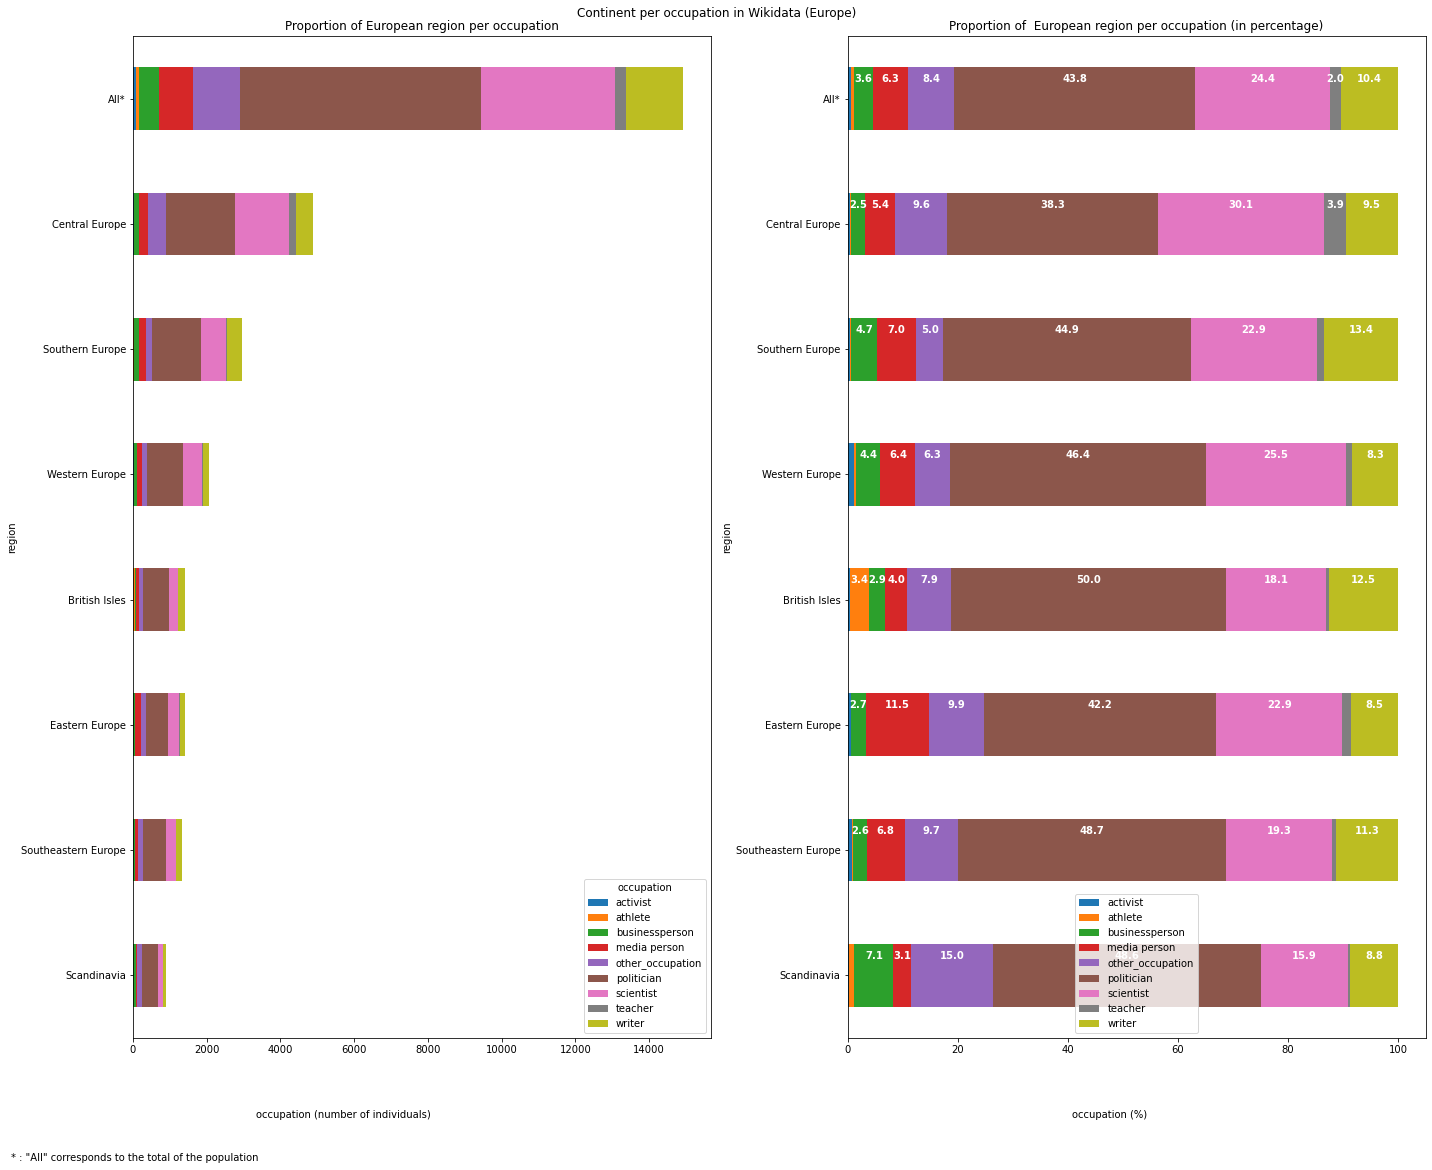

In [100]:
### create subplots side by side: 
# It is the best way, I found, but there are many other: cf. https://stackoverflow.com/questions/56121883/subplots-frequency-plots

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
fig.suptitle('Continent per occupation in Wikidata (Europe)')
contingEuroOcc.plot( kind='barh', stacked=True, ax=ax1, title="Proportion of European region per occupation")
z_OE=perc_contin_OE.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of  European region per occupation (in percentage)")
plt.tight_layout()

# Set labels and legends: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

fig.text(0.747, -0.05, 'occupation (%)', ha='left', va='bottom')
fig.text(0.180, -0.05, 'occupation (number of individuals)', ha='left', va='bottom')
fig.text(0.01, -0.09, '* : "All" corresponds to the total of the population', ha='left', va='bottom')

#  Add percentages on the right plot: cf. https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
### drop the values inferior to: https://stackoverflow.com/questions/54682665/hide-matplot-annotation-if-value-is-0 

for p in z_OE.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 2:
        z_OE.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('exported_pictures/occupations/European_region_per_occupation.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.legend(loc='lower center')
plt.show()

In [101]:
### Generation-occupation Contingency table

X = "generation"  
Y = "occupation"

generation_occupation = merged_euro[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len).fillna(0).astype(int) 
generation_occupation

occupation,activist,athlete,businessperson,media person,other_occupation,politician,scientist,teacher,writer
generation,,,,,,,,,
1771-1791,0,2,5,11,38,157,64,5,40
1791-1811,0,2,5,38,55,310,144,10,72
1811-1831,2,5,13,67,75,423,178,22,107
1831-1851,2,9,31,86,94,488,214,20,132
1851-1871,8,5,51,151,139,748,282,45,188
1871-1891,15,9,58,195,238,984,397,34,235
1891-1911,10,21,56,138,240,812,448,45,236
1911-1931,21,16,90,105,190,892,603,54,236
1931-1951,30,15,222,147,186,1716,1318,66,309


In [102]:
# change the number of individuals into a percentage
perc_contin = generation_occupation.apply(lambda x: x*100/sum(x), axis=1)

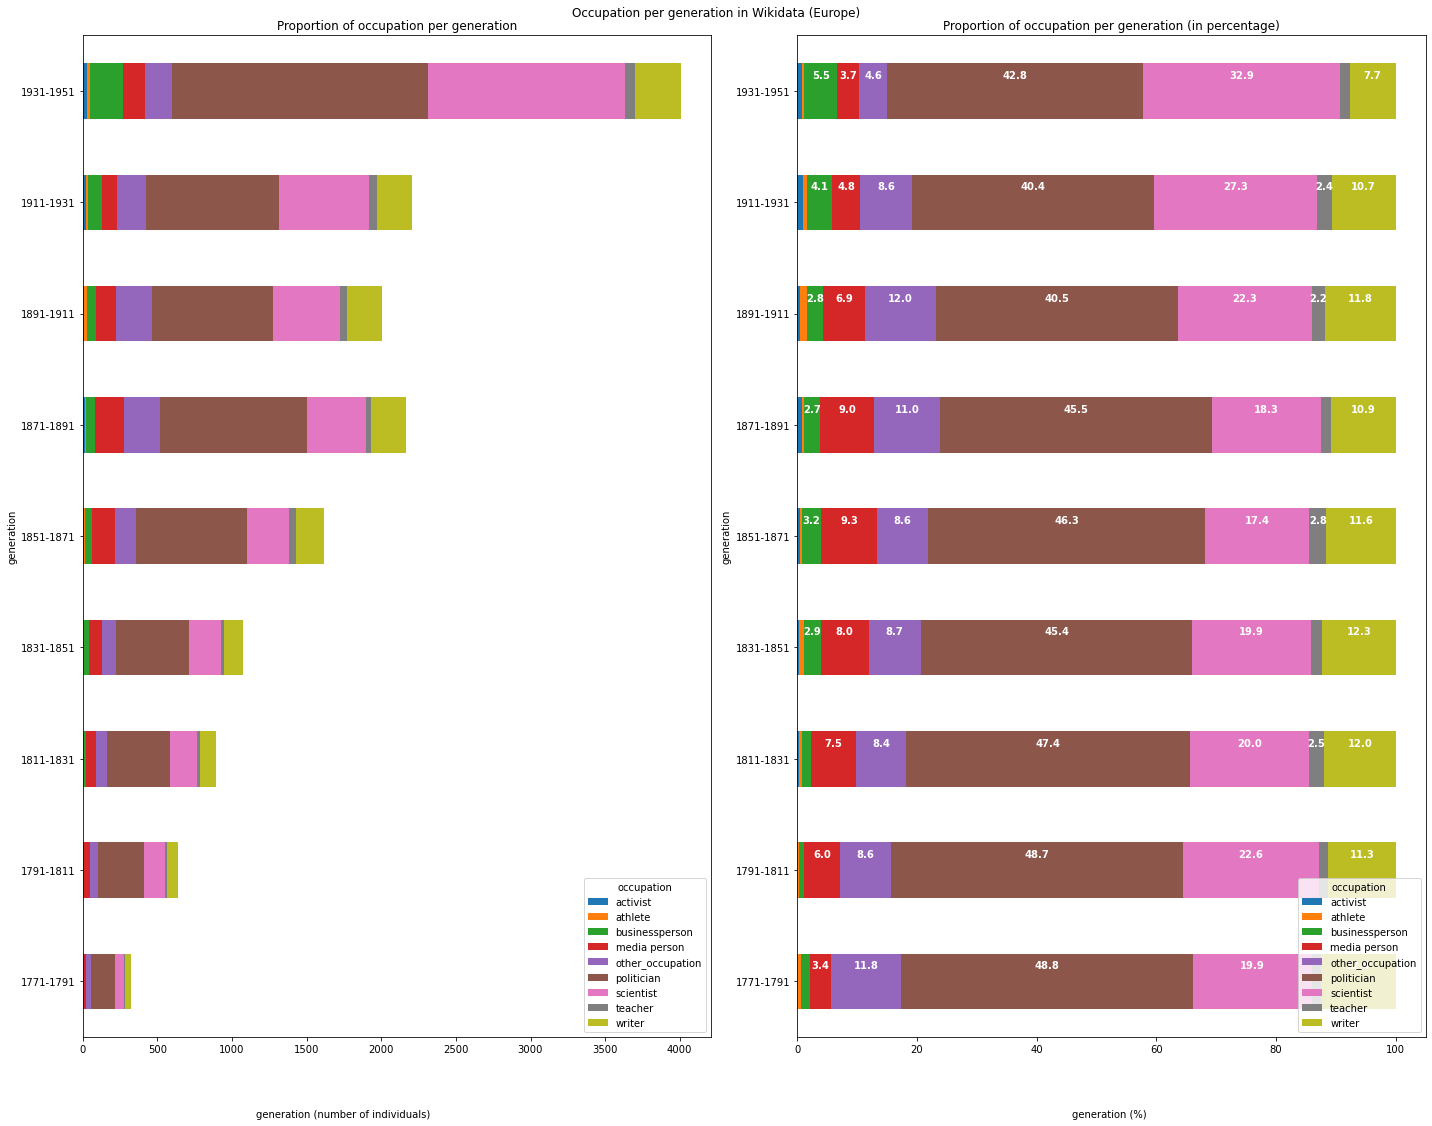

In [103]:
# create subplots side by side:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
fig.suptitle('Occupation per generation in Wikidata (Europe)')
generation_occupation.plot( kind='barh', stacked=True, ax=ax1, title="Proportion of occupation per generation")
z_cont=perc_contin.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of occupation per generation (in percentage)")
plt.tight_layout()

# Set labels and legends

fig.text(0.747, -0.05, 'generation (%)', ha='left', va='bottom')
fig.text(0.180, -0.05, 'generation (number of individuals)', ha='left', va='bottom')

#  Add percentages on the right plot: 

for p in z_cont.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 2:
        z_cont.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

ax1.legend( title= "occupation", loc='lower right')
ax2.legend( title= "occupation", loc='lower right')

plt.savefig('exported_pictures/occupations/Occupation_per_generation_Europe.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.show()